## JSON mini project
### Introduction
JavaScript Object Notation (JSON) is a file format that uses human-readerble text to transmit data object (from Wikipedia).  In this project we first read and tablulate a JSON data file that stores world bank project information. One method to do this job is reading the file using json package and converting its structure into data frame using pandas.io.json.json_normalize function.  The other way is using pandas.read_json function that read json data in a tabulated format automatically.  The diamensions of tables from these two methods are a bit different; this is because the normalization method splits the hierarchical levels of elements into separate columns while the pandas does not.
From any of these data frames we derive the following three outcomes:

* Find the 10 countries with most projects;
* Find the top 10 major project themes (using column 'mjtheme_namecode');
* In the second assessment some entries have only the code and the name is missing - create a dataframe with the missing names filled in.

### Preparation

In [16]:
## Import packages
# pandas for managing data frame
import pandas as pd

# json for handling json format
import json

# pandas.io.json.ison_normalize for restructuring semi-structured data into a flat file
from pandas.io.json import json_normalize

# Packages for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# operater for sorting dictionary
import operator

In [69]:
# Read file with json
with open('world_bank_projects.json') as wbp_json:
    wbp_js = json.load(wbp_json)

# Normalise json data
wbp_nr = json_normalize(wbp_js)
wbp_nr.shape

(500, 55)

In [18]:
# Read file with pandas
wbp_pd = pd.read_json('world_bank_projects.json')
wbp_pd.shape

(500, 50)

There are five more rows in normalised data frame (wbp_nr) than one from pandas (wbp_pd).

In [24]:
# Check column names of two table
print('Normalised: ', wbp_nr.columns,'\nPandas: ', wbp_pd.columns)

Normalised:  Index(['_id.$oid', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract.cdata', 'project_name',
       'projectdocs', 'projectfinancialtype', 'projectstatusdisplay',
       'regionname', 'sector', 'sector1.Name', 'sector1.Percent',
       'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent',
       'sector4.Name', 'sector4.Percent', 'sector_namecode', 'sectorcode',
       'source', 'status', 'supplementprojectflg', 'theme1.Name',
       'theme1.Percent', 'theme_namecode', 'themecode', 'totalamt',
       'to

In [23]:
# Check only differences
nr_diff = wbp_nr.columns.difference(wbp_pd.columns)
pd_diff = wbp_pd.columns.difference(wbp_nr.columns)
print('Normalised: ', nr_diff,'\nPandas: ', pd_diff)

Normalised:  Index(['_id.$oid', 'project_abstract.cdata', 'sector1.Name', 'sector1.Percent',
       'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent',
       'sector4.Name', 'sector4.Percent', 'theme1.Name', 'theme1.Percent'],
      dtype='object') 
Pandas:  Index(['_id', 'project_abstract', 'sector1', 'sector2', 'sector3', 'sector4',
       'theme1'],
      dtype='object')


We found that two tables have the following colimns derived in a different ways:
* wbp_nr: 'sector1.Percent', 'sector2.Name', 'sector2.Percent', 'sector3.Name', 'sector3.Percent','sector4.Name', 'sector4.Percent', 'theme1.Name', 'theme1.Percent'
* wbp_pd: 'sector1', 'sector2', 'sector3', 'sector4', 'theme1'

We look at each table to check that how they present values:

In [21]:
# Normalised table
wbp_nr[:5][['sector1.Percent', 'sector2.Name', 'sector2.Percent', 'sector3.Name', 
            'sector3.Percent','sector4.Name', 'sector4.Percent', 'theme1.Name', 'theme1.Percent']]

,sector1.Percent,sector2.Name,sector2.Percent,sector3.Name,sector3.Percent,sector4.Name,sector4.Percent,theme1.Name,theme1.Percent
0,46,Secondary education,26.0,Public administration- Other social services,16.0,Tertiary education,12.0,Education for all,100
1,70,General public administration sector,30.0,NaN,NaN,NaN,NaN,Other economic management,30
2,100,NaN,NaN,NaN,NaN,NaN,NaN,Regional integration,46
3,100,NaN,NaN,NaN,NaN,NaN,NaN,Participation and civic engagement,50
4,50,Other industry,40.0,SME Finance,10.0,NaN,NaN,Export development and competitiveness,30


In [22]:
# Pandas table
wbp_pd[:5][['sector1', 'sector2', 'sector3', 'sector4', 'theme1']]

,sector1,sector2,sector3,sector4,theme1
0,"{'Percent': 46, 'Name': 'Primary education'}","{'Percent': 26, 'Name': 'Secondary education'}","{'Percent': 16, 'Name': 'Public administration...","{'Percent': 12, 'Name': 'Tertiary education'}","{'Percent': 100, 'Name': 'Education for all'}"
1,"{'Percent': 70, 'Name': 'Public administration...","{'Percent': 30, 'Name': 'General public admini...",NaN,NaN,"{'Percent': 30, 'Name': 'Other economic manage..."
2,"{'Percent': 100, 'Name': 'Rural and Inter-Urba...",NaN,NaN,NaN,"{'Percent': 46, 'Name': 'Regional integration'}"
3,"{'Percent': 100, 'Name': 'Other social services'}",NaN,NaN,NaN,"{'Percent': 50, 'Name': 'Participation and civ..."
4,"{'Percent': 50, 'Name': 'General industry and ...","{'Percent': 40, 'Name': 'Other industry'}","{'Percent': 10, 'Name': 'SME Finance'}",NaN,"{'Percent': 30, 'Name': 'Export development an..."


A column in the wbp_pd table consists of a dictionary with two elements, namely Percent and Name, whilst the wbp_nr table splits two elements into two columns.  We use the wbp_nr table to analyse data for the three assessments stated in the introduction section of this document.

### Ten countries with most projects

In [8]:
# Check head of the table
wbp_nr.head()

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [62]:
# Frequncy of country name
wbp_nr['countryname'].value_counts()[:10]

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [63]:
# Whether the country codes are the same as the country names
wbp_nr['countrycode'].value_counts()[:10]

CN    19
ID    19
VN    17
IN    16
RY    13
MA    12
BD    12
NP    12
MZ    11
3A    11
Name: countrycode, dtype: int64

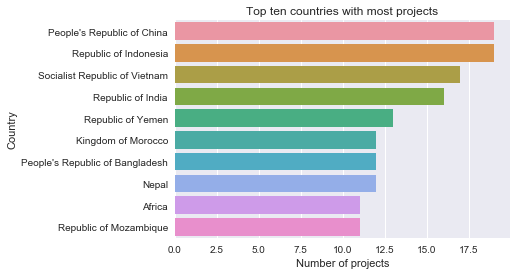

In [83]:
# Visualise the number of projets for the countires with most projects
countries_mostProjects = pd.DataFrame(wbp_nr['countryname'].value_counts()[:10])
countries_mostProjects['Country'] = countries_mostProjects.index
countries_mostProjects['Projects'] = countries_mostProjects['countryname']
sns.set(color_codes = True)
ax = sns.barplot(countries_mostProjects.Projects, countries_mostProjects.Country)
ax.set(xlabel = 'Number of projects')
plt.title('Top ten countries with most projects')
plt.show()

China and Indonesia are the contries that have the greatest number of world bank projects with 19 each, followed by Vietnam with 17 projects.  Other countries with most projects are India(16), Yemen(13), Morocco(12), Bangladesh(12), Nepal(12), Africa(11) and Mozambique(11).

### Ten major project themes

In [70]:
# First row in  'mjtheme_namecode'
wbp_nr['mjtheme_namecode'][0]

[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]

In [71]:
# Dictionaries for major theme count and names
mjtheme_count = {}
mjtheme_names = {}
mjtheme_col = wbp_nr['mjtheme_namecode']

for row in mjtheme_col:
     for item in row:
            if item['code'] not in mjtheme_count.keys():
                mjtheme_count[item['code']] = 1
                
                mjtheme_names[item['code']] = item['name']
            else:
                mjtheme_count[item['code']] += 1
                
                if mjtheme_names[item['code']] == '':
                    mjtheme_names[item['code']] = item['name']

In [72]:
# Print major theme count dictionary
mjtheme_count         

{'1': 38,
 '10': 216,
 '11': 250,
 '2': 199,
 '3': 15,
 '4': 146,
 '5': 77,
 '6': 168,
 '7': 130,
 '8': 210,
 '9': 50}

In [73]:
# Print major theme name dictionary
mjtheme_names 

{'1': 'Economic management',
 '10': 'Rural development',
 '11': 'Environment and natural resources management',
 '2': 'Public sector governance',
 '3': 'Rule of law',
 '4': 'Financial and private sector development',
 '5': 'Trade and integration',
 '6': 'Social protection and risk management',
 '7': 'Social dev/gender/inclusion',
 '8': 'Human development',
 '9': 'Urban development'}

In [74]:
# Assign the project theme name and sort table to find the major ten themes
mjtheme_count_nameKey = {}

for key in mjtheme_count.keys():
     mjtheme_count_nameKey[mjtheme_names[key]] = mjtheme_count[key]
        
mjtheme_sorted = sorted(mjtheme_count_nameKey.items(), key = operator.itemgetter(1), reverse = True)[:10]
mjtheme_sorted

[('Environment and natural resources management', 250),
 ('Rural development', 216),
 ('Human development', 210),
 ('Public sector governance', 199),
 ('Social protection and risk management', 168),
 ('Financial and private sector development', 146),
 ('Social dev/gender/inclusion', 130),
 ('Trade and integration', 77),
 ('Urban development', 50),
 ('Economic management', 38)]

In [75]:
# Visualise the frequencies of the tem major project theme
mjtheme_df = pd.DataFrame(mjtheme_sorted)
mjtheme_df.columns = ['Theme', 'Frequency']
mjtheme_df

,Theme,Frequency
0,Environment and natural resources management,250
1,Rural development,216
2,Human development,210
3,Public sector governance,199
4,Social protection and risk management,168
5,Financial and private sector development,146
6,Social dev/gender/inclusion,130
7,Trade and integration,77
8,Urban development,50
9,Economic management,38


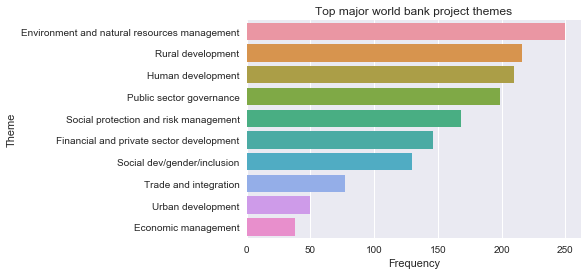

In [76]:
sns.set(color_codes = True)
ax = sns.barplot(mjtheme_df.Frequency, mjtheme_df.Theme)
plt.title('Top major world bank project themes')
plt.show()

The most popular theme of the world bank projects is 'Environment and natural resources management' - 250 relavent researches are held all over the world - and followed by 'Rural developement' project with the frequency of 216. Interestingly, there are only 50 'Urban developement' projects, which is less than a quarter of the 'Rural development' projects.  Other projects consist of a variety of topics covering social, global, economical and scientific developments.

### New data frame with filling missing names of the major themes

In [77]:
# Missing count before imputation
missing_count = 0
mjtheme_col = wbp_nr['mjtheme_namecode']

for row in mjtheme_col:
     for item in row:
            if item['name'] == '':
                missing_count += 1

print('Total missing in names of mjtheme_namecode before imputation: ', missing_count)

Total missing in names of mjtheme_namecode before imputation:  122


In [78]:
# Imputation of the missing names: mjtheme_names was derived eariler
mjtheme_col = wbp_nr['mjtheme_namecode']

for row in mjtheme_col:
     for item in row:
            if item['name'] == '':
                item['name'] = mjtheme_names[item['code']]


In [79]:
# Construct new table
wbp_new = wbp_nr
wbp_new['mjtheme_namecode'] = mjtheme_col
wbp_new.head()

,_id.$oid,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,source,status,supplementprojectflg,theme1.Name,theme1.Percent,theme_namecode,themecode,totalamt,totalcommamt,url
0,52b213b38594d8a2be17c780,1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,IBRD,Active,N,Education for all,100,"[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,52b213b38594d8a2be17c781,2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,IBRD,Active,N,Other economic management,30,"[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,52b213b38594d8a2be17c782,2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,IBRD,Active,Y,Regional integration,46,"[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,52b213b38594d8a2be17c783,2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,IBRD,Active,N,Participation and civic engagement,50,"[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,52b213b38594d8a2be17c784,2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,IBRD,Active,N,Export development and competitiveness,30,"[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [80]:
# Missing count after imputation in the new table
missing_count = 0
mjtheme_col = wbp_new['mjtheme_namecode']

for row in mjtheme_col:
     for item in row:
            if item['name'] == '':
                missing_count += 1

print('Total missing in names of mjtheme_namecode after imputation: ', missing_count)

Total missing in names of mjtheme_namecode after imputation:  0


The new table wbp_new has the column 'mjtheme_namecode', in which the missing theme names are assigned with the names that are matching with their codes, so there is no missing value of this sttribute.